In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

c:\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Rutas de las carpetas de entrenamiento, predicción y test
training_path = 'training'
test_path = 'test'
prediction_path = 'prediction'

In [3]:
# Aumentación de datos con rescalamiento, rotación, traslación, zoom y giro horizontal
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

Found 14034 images belonging to 6 classes.


<Figure size 640x480 with 0 Axes>

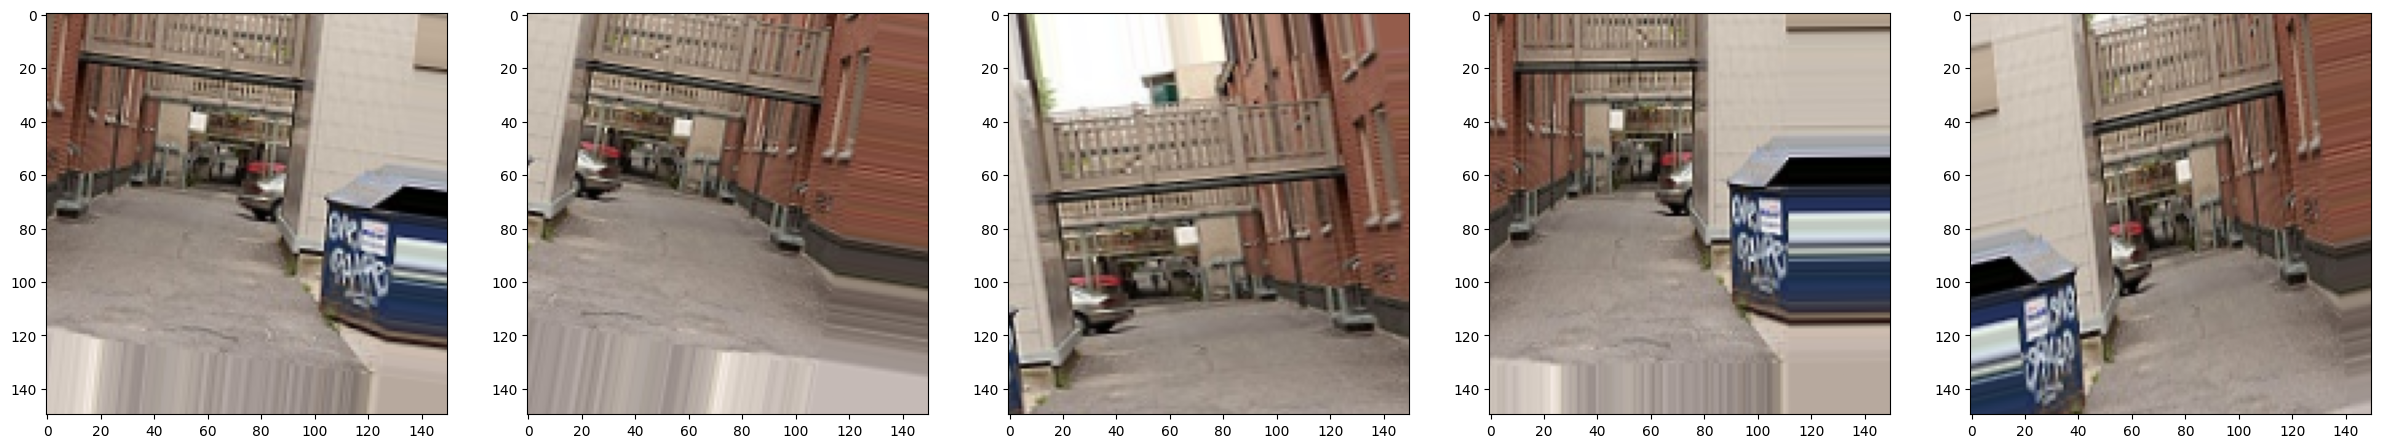

In [4]:
# Crear generadores de datos a partir de los directorios de entrenamiento y prueba
train_generator = datagen.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Crear un plt para mostrar las imágenes
plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

# Iterar sobre las primeras 5 imágenes del generador y mostrarlas
for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Found 14034 images belonging to 6 classes.
(8, 150, 150, 3)
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]


<Figure size 640x480 with 0 Axes>

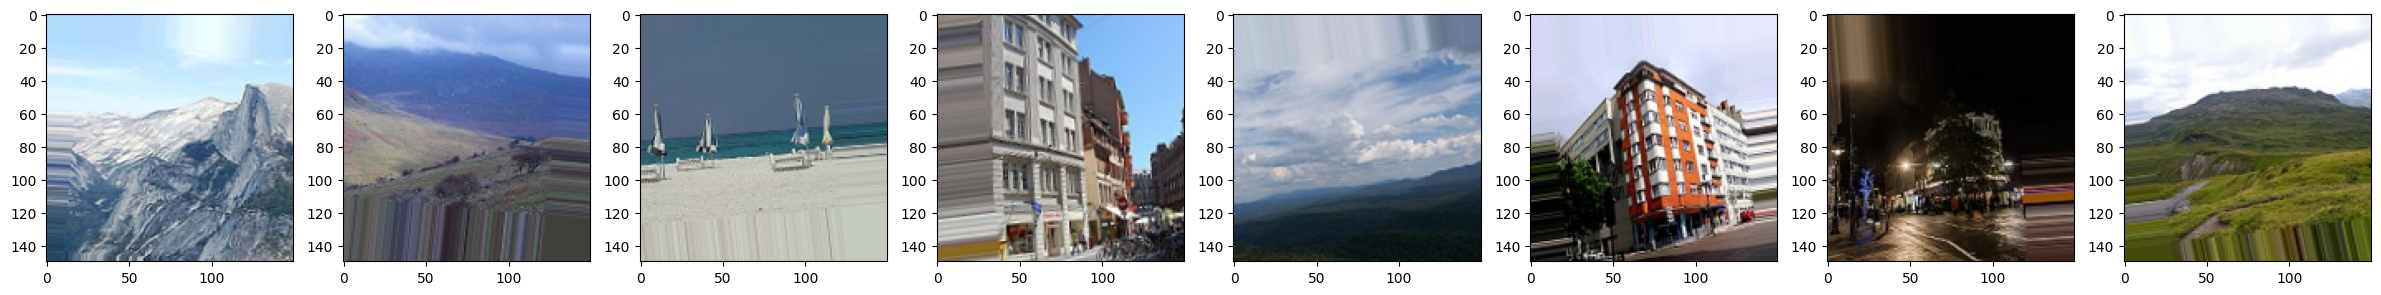

In [5]:
# Crear un generador de datos a partir de un directorio de entrenamiento
train_generator = datagen.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical'
)

images, labels = next(train_generator)

print(images.shape)
print(labels)
plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]):
    axarr[i].imshow(images[i])

# Mostrar las imágenes del principio
plt.show()

In [6]:
# Generador de datos a utilizar a partir del directorio de testing
test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Generador de datos a utilizar a partir del directorio de entrenamiento
train_generator = datagen.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 3000 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.


In [7]:
# Cargar el modelo ResNet50 pre-entrenado
base_model = ResNet50(weights='imagenet', include_top=False)

# Añadir capas para el procesamiento y clasificación de la información.
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(6, activation='softmax')(x)

In [8]:
# Definir el modelo final y congelar todas las capas de la base ResNet50
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Compilación y entrenamiento del modelo usando 20 épocas para mayor exactitud.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=20,  
)

Epoch 1/20


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 299s 663ms/step - accuracy: 0.4676 - loss: 1.2994
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 289s 657ms/step - accuracy: 0.5988 - loss: 1.0053
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 298s 677ms/step - accuracy: 0.6220 - loss: 0.9652
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 290s 660ms/step - accuracy: 0.6410 - loss: 0.9264
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 292s 662ms/step - accuracy: 0.6633 - loss: 0.8749
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 289s 657ms/step - accuracy: 0.6603 - loss: 0.8772
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 291s 661ms/step - accuracy: 0.6782 - loss: 0.8461
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 292s 663ms/step - accuracy: 0.6845 - loss: 0.8311
Epoch 9/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 288s 655ms/step - accuracy: 0.7001 - loss: 0.7894
Epoch 10/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 312s 708ms/step - accuracy: 0.6939 - loss: 0.8058
Epoch 11/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 302s 686ms/step - accuracy: 0.7071 - loss: 0.7853
Epoch 12/20
439/439

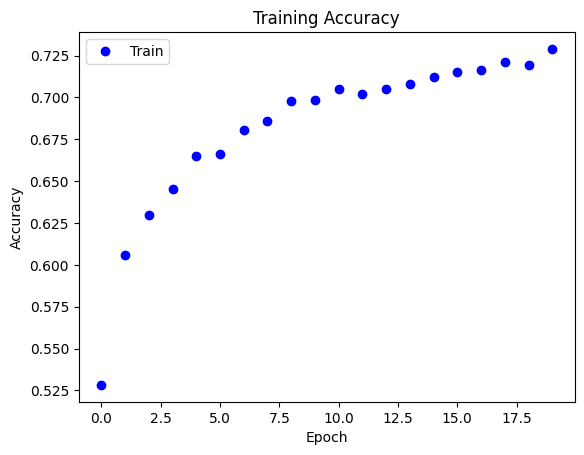

In [9]:
# Mostrar las curvas de precisión del entrenamiento
plt.plot(history.history['accuracy'], 'bo', label='Train Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

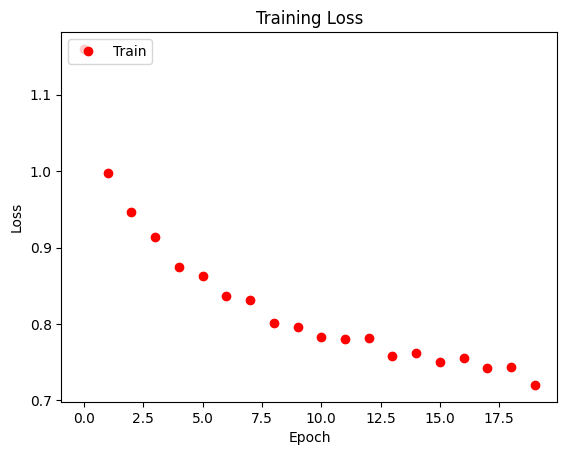

In [10]:
# Mostrar las curvas de pérdida del entrenamiento
plt.plot(history.history['loss'], 'ro', label='Train Loss')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [11]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 54s 549ms/step - accuracy: 0.4520 - loss: 1.5604
Test Accuracy: 0.45766666531562805
Test Loss: 1.5468508005142212
